In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('/datasets/emotion_data.csv')
data.head()

,Answer,fear,anger,anxiety,shame,awkwardness,boredom,calmness,confusion,disgust,excitement,frustration,happiness,jealousy,nostalgia,pride,sadness,satisfaction,surprise
0,"My family was the most salient part of my day,...",0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,Yoga keeps me focused. I am able to take some ...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,"Yesterday, my family and I played a bunch of b...",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,"Yesterday, I visited my parents and had dinner...",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,"Yesterday, I really felt the importance of my ...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
emo_labels = data.columns[1:]
emo_labels

Index(['fear', 'anger', 'anxiety', 'shame', 'awkwardness', 'boredom',
       'calmness', 'confusion', 'disgust', 'excitement', 'frustration',
       'happiness', 'jealousy', 'nostalgia', 'pride', 'sadness',
       'satisfaction', 'surprise'],
      dtype='object')

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
analyzer = SentimentIntensityAnalyzer()
labels = []
scores = []

for row in data.iterrows():
  score = analyzer.polarity_scores(row[1]["Answer"])['compound']
  scores.append(score)
  if score >= 0:
    labels.append(0)
  else:
    labels.append(1)

In [ ]:
data['clustering labels'] = labels
data['scores'] = scores
data.head()

,Answer,fear,anger,anxiety,shame,awkwardness,boredom,calmness,confusion,disgust,...,frustration,happiness,jealousy,nostalgia,pride,sadness,satisfaction,surprise,clustering labels,scores
0,"My family was the most salient part of my day,...",0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0.9280
1,Yoga keeps me focused. I am able to take some ...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.5267
2,"Yesterday, my family and I played a bunch of b...",0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0.9418
3,"Yesterday, I visited my parents and had dinner...",0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.6077
4,"Yesterday, I really felt the importance of my ...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.5399


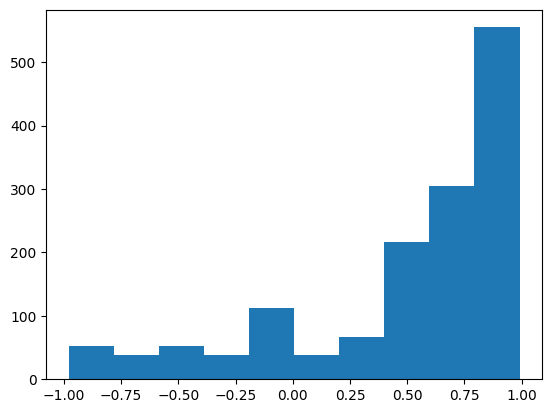

In [ ]:
plt.hist(scores, bins = 10)
plt.show()

In [ ]:
cluster_0_fear = len(data[data['clustering labels'] == 0][data['fear'] == 1])
cluster_0_anger = len(data[data['clustering labels'] == 0][data['anger'] == 1])
cluster_0_anxiety = len(data[data['clustering labels'] == 0][data['anxiety'] == 1])
cluster_0_shame = len(data[data['clustering labels'] == 0][data['shame'] == 1])
cluster_0_awkwardness = len(data[data['clustering labels'] == 0][data['awkwardness'] == 1])
cluster_0_boredom = len(data[data['clustering labels'] == 0][data['boredom'] == 1])
cluster_0_calmness = len(data[data['clustering labels'] == 0][data['calmness'] == 1])
cluster_0_confusion = len(data[data['clustering labels'] == 0][data['confusion'] == 1])
cluster_0_disgust = len(data[data['clustering labels'] == 0][data['disgust'] == 1])
cluster_0_excitement = len(data[data['clustering labels'] == 0][data['excitement'] == 1])
cluster_0_frustration = len(data[data['clustering labels'] == 0][data['frustration'] == 1])
cluster_0_happiness = len(data[data['clustering labels'] == 0][data['happiness'] == 1])
cluster_0_jealousy = len(data[data['clustering labels'] == 0][data['jealousy'] == 1])
cluster_0_nostalgia = len(data[data['clustering labels'] == 0][data['nostalgia'] == 1])
cluster_0_pride = len(data[data['clustering labels'] == 0][data['pride'] == 1])
cluster_0_sadness = len(data[data['clustering labels'] == 0][data['sadness'] == 1])
cluster_0_satisfaction = len(data[data['clustering labels'] == 0][data['satisfaction'] == 1])
cluster_0_surprise = len(data[data['clustering labels'] == 0][data['surprise'] == 1])

cluster_1_fear = len(data[data['clustering labels'] == 1][data['fear'] == 1])
cluster_1_anger = len(data[data['clustering labels'] == 1][data['anger'] == 1])
cluster_1_anxiety = len(data[data['clustering labels'] == 1][data['anxiety'] == 1])
cluster_1_shame = len(data[data['clustering labels'] == 1][data['shame'] == 1])
cluster_1_awkwardness = len(data[data['clustering labels'] == 1][data['awkwardness'] == 1])
cluster_1_boredom = len(data[data['clustering labels'] == 1][data['boredom'] == 1])
cluster_1_calmness = len(data[data['clustering labels'] == 1][data['calmness'] == 1])
cluster_1_confusion = len(data[data['clustering labels'] == 1][data['confusion'] == 1])
cluster_1_disgust = len(data[data['clustering labels'] == 1][data['disgust'] == 1])
cluster_1_excitement = len(data[data['clustering labels'] == 1][data['excitement'] == 1])
cluster_1_frustration = len(data[data['clustering labels'] == 1][data['frustration'] == 1])
cluster_1_happiness = len(data[data['clustering labels'] == 1][data['happiness'] == 1])
cluster_1_jealousy = len(data[data['clustering labels'] == 1][data['jealousy'] == 1])
cluster_1_nostalgia = len(data[data['clustering labels'] == 1][data['nostalgia'] == 1])
cluster_1_pride = len(data[data['clustering labels'] == 1][data['pride'] == 1])
cluster_1_sadness = len(data[data['clustering labels'] == 1][data['sadness'] == 1])
cluster_1_satisfaction = len(data[data['clustering labels'] == 1][data['satisfaction'] == 1])
cluster_1_surprise = len(data[data['clustering labels'] == 1][data['surprise'] == 1])

# cluster_2_fear = len(data[data['clustering labels'] == 2][data['fear'] == 1])
# cluster_2_anger = len(data[data['clustering labels'] == 2][data['anger'] == 1])
# cluster_2_anxiety = len(data[data['clustering labels'] == 2][data['anxiety'] == 1])
# cluster_2_shame = len(data[data['clustering labels'] == 2][data['shame'] == 1])
# cluster_2_awkwardness = len(data[data['clustering labels'] == 2][data['awkwardness'] == 1])
# cluster_2_boredom = len(data[data['clustering labels'] == 2][data['boredom'] == 1])
# cluster_2_calmness = len(data[data['clustering labels'] == 2][data['calmness'] == 1])
# cluster_2_confusion = len(data[data['clustering labels'] == 2][data['confusion'] == 1])
# cluster_2_disgust = len(data[data['clustering labels'] == 2][data['disgust'] == 1])
# cluster_2_excitement = len(data[data['clustering labels'] == 2][data['excitement'] == 1])
# cluster_2_frustration = len(data[data['clustering labels'] == 2][data['frustration'] == 1])
# cluster_2_happiness = len(data[data['clustering labels'] == 2][data['happiness'] == 1])
# cluster_2_jealousy = len(data[data['clustering labels'] == 2][data['jealousy'] == 1])
# cluster_2_nostalgia = len(data[data['clustering labels'] == 2][data['nostalgia'] == 1])
# cluster_2_pride = len(data[data['clustering labels'] == 2][data['pride'] == 1])
# cluster_2_sadness = len(data[data['clustering labels'] == 2][data['sadness'] == 1])
# cluster_2_satisfaction = len(data[data['clustering labels'] == 2][data['satisfaction'] == 1])
# cluster_2_surprise = len(data[data['clustering labels'] == 2][data['surprise'] == 1])

<ipython-input-45-0e8e32b8513d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_fear = len(data[data['clustering labels'] == 0][data['fear'] == 1])
<ipython-input-45-0e8e32b8513d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_anger = len(data[data['clustering labels'] == 0][data['anger'] == 1])
<ipython-input-45-0e8e32b8513d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_anxiety = len(data[data['clustering labels'] == 0][data['anxiety'] == 1])
<ipython-input-45-0e8e32b8513d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_shame = len(data[data['clustering labels'] == 0][data['shame'] == 1])
<ipython-input-45-0e8e32b8513d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_awkwardness = len(data[data['clustering labels'] == 0][data['awkwardness'] == 1])
<ipython-input-45-0e8

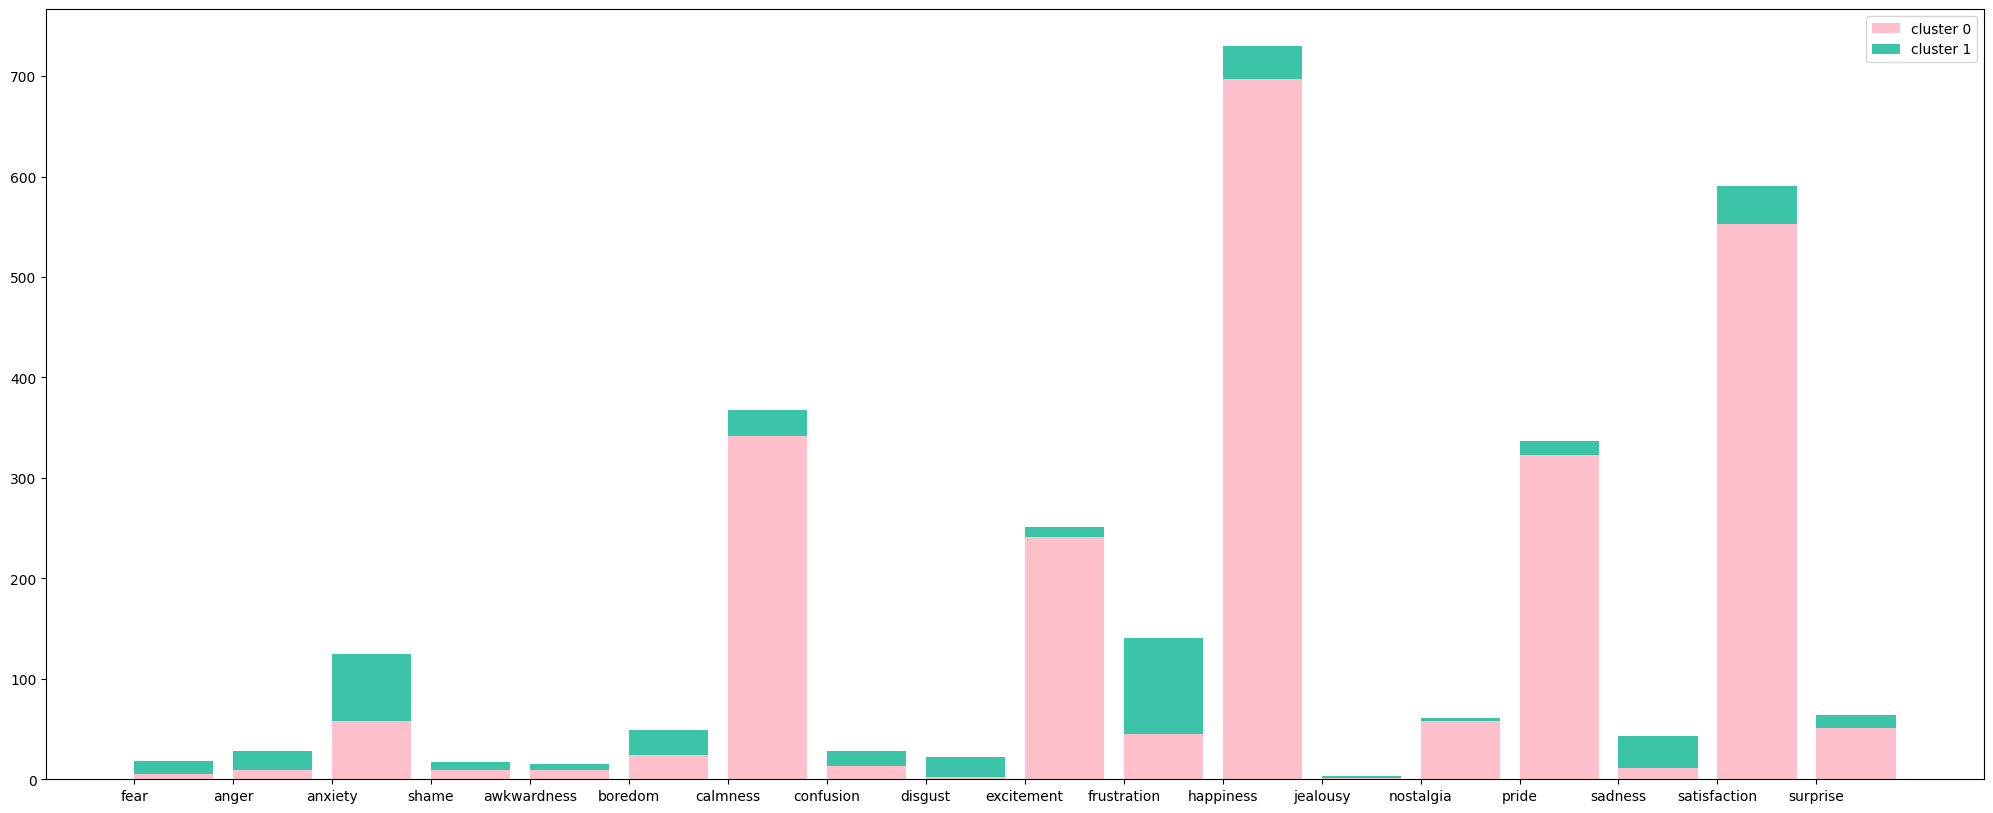

In [ ]:
X = ['fear', 'anger', 'anxiety', 'shame', 'awkwardness', 'boredom',
       'calmness', 'confusion', 'disgust', 'excitement', 'frustration',
       'happiness', 'jealousy', 'nostalgia', 'pride', 'sadness',
       'satisfaction', 'surprise']

y1 = np.array([cluster_0_fear, cluster_0_anger, cluster_0_anxiety, cluster_0_shame, cluster_0_awkwardness, cluster_0_boredom, cluster_0_calmness, cluster_0_confusion, cluster_0_disgust, cluster_0_excitement, cluster_0_frustration, cluster_0_happiness, cluster_0_jealousy, cluster_0_nostalgia, cluster_0_pride, cluster_0_sadness, cluster_0_satisfaction, cluster_0_surprise])
y2 = np.array([cluster_1_fear, cluster_1_anger, cluster_1_anxiety, cluster_1_shame, cluster_1_awkwardness, cluster_1_boredom, cluster_1_calmness, cluster_1_confusion, cluster_1_disgust, cluster_1_excitement, cluster_1_frustration, cluster_1_happiness, cluster_1_jealousy, cluster_1_nostalgia, cluster_1_pride, cluster_1_sadness, cluster_1_satisfaction, cluster_1_surprise])
# y3 = np.array([cluster_2_fear, cluster_2_anger, cluster_2_anxiety, cluster_2_shame, cluster_2_awkwardness, cluster_2_boredom, cluster_2_calmness, cluster_2_confusion, cluster_2_disgust, cluster_2_excitement, cluster_2_frustration, cluster_2_happiness, cluster_2_jealousy, cluster_2_nostalgia, cluster_2_pride, cluster_2_sadness, cluster_2_satisfaction, cluster_2_surprise])


plt.figure(figsize=(25, 10))
plt.bar(X, y1, color='pink', align='edge', width = 0.8)
plt.bar(X, y2, bottom=y1, color='#3bc4a7', align='edge', width = 0.8)
# plt.bar(X, y3, bottom=y1+y2, color='#3bc4a7', align='edge', width = 0.8)

plt.legend(["cluster 0", "cluster 1"])

plt.show()

In [ ]:
import re
import string
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'\d+', "", str(text))
  text = re.sub(r'[^\w\s]', "", text)

  tokens = nltk.word_tokenize(text)

  return(tokens)

def remove_stopwords(tokens):
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]
  return filtered_tokens

def perform_lemmatization(tokens):
  lemmatizer = nltk.WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens

def clean_text(text):
  tokens = preprocess_text(text)
  filtered_tokens = remove_stopwords(tokens)
  lemmatized_tokens = perform_lemmatization(filtered_tokens)
  clean_text = ' '.join(lemmatized_tokens)
  return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data['cleaner_text'] = data["Answer"].map(lambda entries : clean_text(entries))
data.head()

,Answer,fear,anger,anxiety,shame,awkwardness,boredom,calmness,confusion,disgust,...,happiness,jealousy,nostalgia,pride,sadness,satisfaction,surprise,clustering labels,scores,cleaner_text
0,"My family was the most salient part of my day,...",0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0.9280,family salient part day since day care child o...
1,Yoga keeps me focused. I am able to take some ...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.5267,yoga keep focused able take time breath work b...
2,"Yesterday, my family and I played a bunch of b...",0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0.9418,yesterday family played bunch board game husba...
3,"Yesterday, I visited my parents and had dinner...",0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0.6077,yesterday visited parent dinner hadnt seen wee...
4,"Yesterday, I really felt the importance of my ...",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.5399,yesterday really felt importance health went b...


In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import time

In [ ]:
minority = ""
if (data["clustering labels"] == 0).sum() < (data["clustering labels"] == 1).sum():
  minority = "cluster 0"
else:
  minority = "cluster 1"


print(minority)
print((data["clustering labels"] == 0).sum())
print((data["clustering labels"] == 1).sum())

cluster 1
1261
212


In [ ]:
from sklearn.utils import resample

if minority == "cluster 0":
  data_minority = data[data["clustering labels"] == 0]
  data_majority = data[data["clustering labels"] == 1]
  majority_size = (data["clustering labels"] == 1).sum()
else:
  data_minority = data[data["clustering labels"] == 1]
  data_majority = data[data["clustering labels"] == 0]
  majority_size = (data["clustering labels"] == 0).sum()

data_minority_upsampled = resample(data_minority, replace = True, n_samples = 7000, random_state = 42)
data_majority_upsampled = resample(data_majority, replace = True, n_samples = 7000, random_state = 42)
data_upsampled = pd.concat([data_majority_upsampled, data_minority_upsampled])

data = data_upsampled

In [ ]:
cluster_0 = data[data['clustering labels'] == 0]
cluster_1 = data[data['clustering labels'] == 1]

In [ ]:
cluster_0_fear = len(cluster_0[cluster_0["fear"] == 1])
cluster_0_anger = len(cluster_0[cluster_0["anger"] == 1])
cluster_0_anxiety = len(cluster_0[cluster_0["anxiety"] == 1])
cluster_0_shame = len(cluster_0[cluster_0["shame"] == 1])
cluster_0_awkwardness = len(cluster_0[cluster_0["awkwardness"] == 1])
cluster_0_boredom = len(cluster_0[cluster_0["boredom"] == 1])
cluster_0_calmness = len(cluster_0[cluster_0["calmness"] == 1])
cluster_0_confusion = len(cluster_0[cluster_0["confusion"] == 1])
cluster_0_disgust = len(cluster_0[cluster_0["disgust"] == 1])
cluster_0_excitement = len(cluster_0[cluster_0["excitement"] == 1])
cluster_0_frustration = len(cluster_0[cluster_0["frustration"] == 1])
cluster_0_happiness = len(cluster_0[cluster_0["happiness"] == 1])
cluster_0_jealousy = len(cluster_0[cluster_0["jealousy"] == 1])
cluster_0_nostalgia = len(cluster_0[cluster_0["nostalgia"] == 1])
cluster_0_pride = len(cluster_0[cluster_0["pride"] == 1])
cluster_0_sadness = len(cluster_0[cluster_0["sadness"] == 1])
cluster_0_satisfaction = len(cluster_0[cluster_0["satisfaction"] == 1])
cluster_0_surprise = len(cluster_0[cluster_0["surprise"] == 1])


cluster_1_fear = len(cluster_1[cluster_1["fear"] == 1])
cluster_1_anger = len(cluster_1[cluster_1["anger"] == 1])
cluster_1_anxiety = len(cluster_1[cluster_1["anxiety"] == 1])
cluster_1_shame = len(cluster_1[cluster_1["shame"] == 1])
cluster_1_awkwardness = len(cluster_1[cluster_1["awkwardness"] == 1])
cluster_1_boredom = len(cluster_1[cluster_1["boredom"] == 1])
cluster_1_calmness = len(cluster_1[cluster_1["calmness"] == 1])
cluster_1_confusion = len(cluster_1[cluster_1["confusion"] == 1])
cluster_1_disgust = len(cluster_1[cluster_1["disgust"] == 1])
cluster_1_excitement = len(cluster_1[cluster_1["excitement"] == 1])
cluster_1_frustration = len(cluster_1[cluster_1["frustration"] == 1])
cluster_1_happiness = len(cluster_1[cluster_1["happiness"] == 1])
cluster_1_jealousy = len(cluster_1[cluster_1["jealousy"] == 1])
cluster_1_nostalgia = len(cluster_1[cluster_1["nostalgia"] == 1])
cluster_1_pride = len(cluster_1[cluster_1["pride"] == 1])
cluster_1_sadness = len(cluster_1[cluster_1["sadness"] == 1])
cluster_1_satisfaction = len(cluster_1[cluster_1["satisfaction"] == 1])
cluster_1_surprise = len(cluster_1[cluster_1["surprise"] == 1])

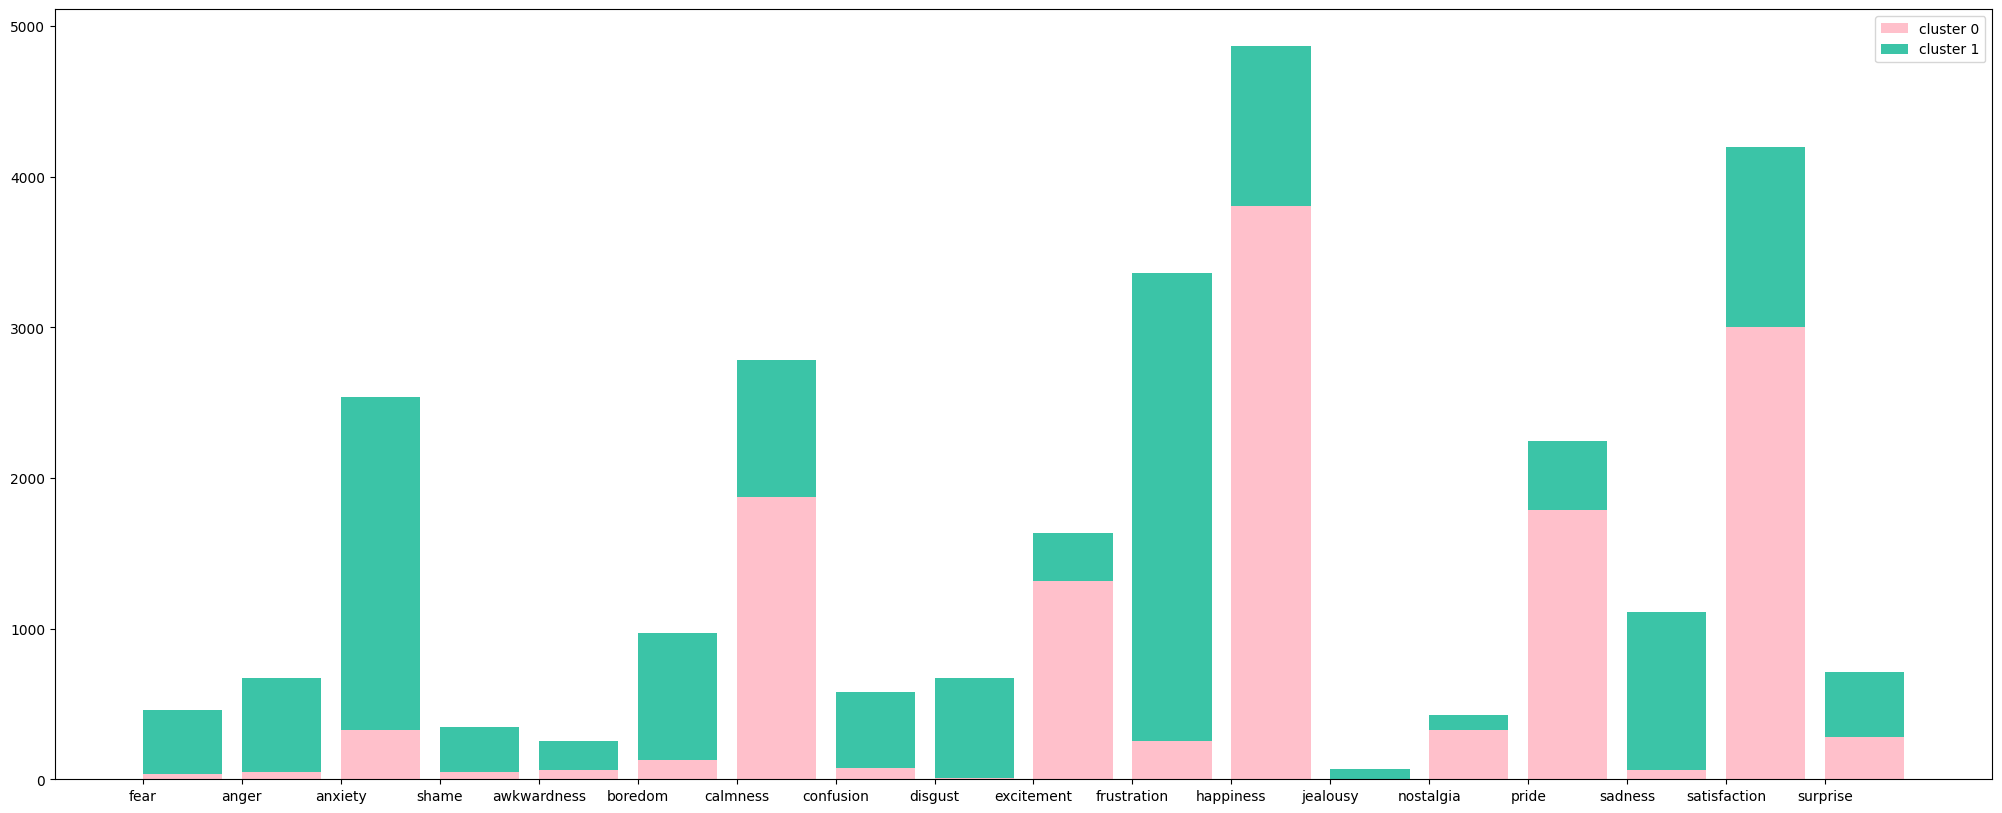

In [ ]:
X = ['fear', 'anger', 'anxiety', 'shame', 'awkwardness', 'boredom',
       'calmness', 'confusion', 'disgust', 'excitement', 'frustration',
       'happiness', 'jealousy', 'nostalgia', 'pride', 'sadness',
       'satisfaction', 'surprise']

y1 = np.array([cluster_0_fear, cluster_0_anger, cluster_0_anxiety, cluster_0_shame, cluster_0_awkwardness, cluster_0_boredom, cluster_0_calmness, cluster_0_confusion, cluster_0_disgust, cluster_0_excitement, cluster_0_frustration, cluster_0_happiness, cluster_0_jealousy, cluster_0_nostalgia, cluster_0_pride, cluster_0_sadness, cluster_0_satisfaction, cluster_0_surprise])
y2 = np.array([cluster_1_fear, cluster_1_anger, cluster_1_anxiety, cluster_1_shame, cluster_1_awkwardness, cluster_1_boredom, cluster_1_calmness, cluster_1_confusion, cluster_1_disgust, cluster_1_excitement, cluster_1_frustration, cluster_1_happiness, cluster_1_jealousy, cluster_1_nostalgia, cluster_1_pride, cluster_1_sadness, cluster_1_satisfaction, cluster_1_surprise])
# y3 = np.array([cluster_2_fear, cluster_2_anger, cluster_2_anxiety, cluster_2_shame, cluster_2_awkwardness, cluster_2_boredom, cluster_2_calmness, cluster_2_confusion, cluster_2_disgust, cluster_2_excitement, cluster_2_frustration, cluster_2_happiness, cluster_2_jealousy, cluster_2_nostalgia, cluster_2_pride, cluster_2_sadness, cluster_2_satisfaction, cluster_2_surprise])


plt.figure(figsize=(25, 10))
plt.bar(X, y1, color='pink', align='edge', width = 0.8)
plt.bar(X, y2, bottom=y1, color='#3bc4a7', align='edge', width = 0.8)
# plt.bar(X, y3, bottom=y1+y2, color='#3bc4a7', align='edge', width = 0.8)

plt.legend(["cluster 0", "cluster 1"])

plt.show()

In [ ]:
from collections import Counter

def counter_word(text_col):
  count = Counter()
  for text in text_col.values:
    for word in text.split():
      count[word] += 1
  return count

counter = counter_word(data['cleaner_text'])

In [ ]:
len(counter)

3715

In [ ]:
counter

Counter({'got': 1571,
         'spend': 501,
         'nice': 526,
         'evening': 275,
         'husband': 464,
         'made': 1763,
         'good': 2679,
         'day': 4618,
         'work': 4238,
         'calm': 278,
         'pleasant': 38,
         'get': 2242,
         'bit': 446,
         'exercise': 544,
         'tody': 3,
         'dog': 414,
         'apple': 5,
         'watch': 183,
         'say': 159,
         'didnt': 828,
         'quite': 161,
         'make': 1449,
         'daily': 276,
         'calorie': 31,
         'goal': 250,
         'better': 460,
         'tomorrow': 86,
         'another': 227,
         'try': 337,
         'back': 1003,
         'every': 472,
         'forgot': 18,
         'bring': 92,
         'lunch': 225,
         'yesterday': 3525,
         'consisted': 6,
         'pop': 6,
         'tart': 6,
         'brought': 70,
         'possible': 36,
         'snack': 73,
         'pretty': 416,
         'pathetic': 6,
         'su

In [ ]:
counter.most_common(5)

[('day', 4618),
 ('work', 4238),
 ('yesterday', 3525),
 ('time', 3355),
 ('good', 2679)]

In [ ]:
num_unique_words = len(counter)

In [ ]:
from sklearn.model_selection import train_test_split

X = data['cleaner_text']
y = data['clustering labels']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)



X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index
word_index

{'day': 1,
 'work': 2,
 'yesterday': 3,
 'time': 4,
 'good': 5,
 'get': 6,
 'feel': 7,
 'felt': 8,
 'like': 9,
 'made': 10,
 'really': 11,
 'got': 12,
 'sleep': 13,
 'night': 14,
 'thing': 15,
 'make': 16,
 'able': 17,
 'im': 18,
 'family': 19,
 'hour': 20,
 'happy': 21,
 'much': 22,
 'going': 23,
 'went': 24,
 'last': 25,
 'great': 26,
 'home': 27,
 'one': 28,
 'friend': 29,
 'back': 30,
 'go': 31,
 'lot': 32,
 'dinner': 33,
 'new': 34,
 'feeling': 35,
 'also': 36,
 'working': 37,
 'well': 38,
 'important': 39,
 'didnt': 40,
 'today': 41,
 'life': 42,
 'frustrating': 43,
 'week': 44,
 'spent': 45,
 'something': 46,
 'job': 47,
 'would': 48,
 'food': 49,
 'need': 50,
 'sick': 51,
 'know': 52,
 'love': 53,
 'long': 54,
 'frustrated': 55,
 'dont': 56,
 'part': 57,
 'hard': 58,
 'always': 59,
 'getting': 60,
 'god': 61,
 'tired': 62,
 'could': 63,
 'take': 64,
 'exercise': 65,
 'anxious': 66,
 'trying': 67,
 'still': 68,
 'even': 69,
 'eat': 70,
 'pain': 71,
 'worked': 72,
 'year': 73,
 '

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

print(X_train[10 : 15])
print(train_sequences[10 : 15])

['day good son received three award academic character proud'
 'working throughout day probably least salient thing yesterday since already exhausted working felt like chore couldnt wait relax nothing knew daily quota fill begrudgingly finished work although felt fairly useless'
 'love food cooked food enjoyed dinner family'
 'happy husband plus year worked together cook meal kitchen dinner cleaning enjoyable evening watching favorite television program good peaceful day'
 'spent large part day yesterday husband car taking niece car run errand felt anxious near end day felt like spending much time something feeling resentful']
[[1, 5, 122, 874, 256, 1921, 2185, 2186, 79], [37, 283, 1, 374, 299, 123, 15, 3, 108, 291, 275, 37, 8, 9, 799, 137, 286, 233, 160, 323, 167, 819, 929, 964, 385, 2, 454, 8, 163, 965], [53, 49, 354, 49, 149, 33, 19], [21, 89, 689, 73, 72, 84, 217, 135, 763, 33, 725, 347, 172, 156, 243, 1581, 504, 5, 655, 1], [45, 220, 57, 1, 3, 89, 313, 258, 624, 313, 126, 800, 8, 

In [ ]:
max_length = 0

for sequence in train_sequences:
  if len(sequence) > max_length:
    max_length = len(sequence)

for sequence in test_sequences:
  if len(sequence) > max_length:
    max_length = len(sequence)

max_length

98

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

train_padded[10]

array([   1,    5,  122,  874,  256, 1921, 2185, 2186,   79,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [ ]:
print(X_train[10])
print(train_sequences[10])
print(train_padded[10])

day good son received three award academic character proud
[1, 5, 122, 874, 256, 1921, 2185, 2186, 79]
[   1    5  122  874  256 1921 2185 2186   79    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{1: 'day',
 2: 'work',
 3: 'yesterday',
 4: 'time',
 5: 'good',
 6: 'get',
 7: 'feel',
 8: 'felt',
 9: 'like',
 10: 'made',
 11: 'really',
 12: 'got',
 13: 'sleep',
 14: 'night',
 15: 'thing',
 16: 'make',
 17: 'able',
 18: 'im',
 19: 'family',
 20: 'hour',
 21: 'happy',
 22: 'much',
 23: 'going',
 24: 'went',
 25: 'last',
 26: 'great',
 27: 'home',
 28: 'one',
 29: 'friend',
 30: 'back',
 31: 'go',
 32: 'lot',
 33: 'dinner',
 34: 'new',
 35: 'feeling',
 36: 'also',
 37: 'working',
 38: 'well',
 39: 'important',
 40: 'didnt',
 41: 'today',
 42: 'life',
 43: 'frustrating',
 44: 'week',
 45: 'spent',
 46: 'something',
 47: 'job',
 48: 'would',
 49: 'food',
 50: 'need',
 51: 'sick',
 52: 'know',
 53: 'love',
 54: 'long',
 55: 'frustrated',
 56: 'dont',
 57: 'part',
 58: 'hard',
 59: 'always',
 60: 'getting',
 61: 'god',
 62: 'tired',
 63: 'could',
 64: 'take',
 65: 'exercise',
 66: 'anxious',
 67: 'trying',
 68: 'still',
 69: 'even',
 70: 'eat',
 71: 'pain',
 72: 'worked',
 73: 'year',
 7

In [ ]:
def decode(sequence):
  return " ".join([reverse_word_index.get(i, '?') for i in sequence])

decoded_text = decode(train_sequences[10])
print(train_sequences[10])
print(X_train[10])
print(decoded_text)

[1, 5, 122, 874, 256, 1921, 2185, 2186, 79]
day good son received three award academic character proud
day good son received three award academic character proud


In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(num_unique_words, 16, input_length = max_length),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(24, activation = "relu"),
#     tf.keras.layers.Dense(1, activation = "sigmoid")
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_unique_words, 128, input_length = max_length),
    tf.keras.layers.LSTM(256, dropout=0.5, recurrent_dropout=0.5, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_padded, y_train, epochs = 10, validation_data = (test_padded, y_test), verbose = 2)

Epoch 1/10
350/350 - 159s - 454ms/step - accuracy: 0.8296 - loss: 0.3516 - val_accuracy: 0.9721 - val_loss: 0.1297
Epoch 2/10
350/350 - 206s - 590ms/step - accuracy: 0.9713 - loss: 0.1217 - val_accuracy: 0.9832 - val_loss: 0.0758
Epoch 3/10
350/350 - 197s - 564ms/step - accuracy: 0.9822 - loss: 0.0828 - val_accuracy: 0.9904 - val_loss: 0.0528
Epoch 4/10
350/350 - 211s - 602ms/step - accuracy: 0.9913 - loss: 0.0464 - val_accuracy: 0.9932 - val_loss: 0.0393
Epoch 5/10
350/350 - 208s - 593ms/step - accuracy: 0.9942 - loss: 0.0325 - val_accuracy: 0.9939 - val_loss: 0.0394
Epoch 6/10
350/350 - 157s - 448ms/step - accuracy: 0.9923 - loss: 0.0397 - val_accuracy: 0.9964 - val_loss: 0.0212
Epoch 7/10
350/350 - 167s - 478ms/step - accuracy: 0.9946 - loss: 0.0279 - val_accuracy: 0.9954 - val_loss: 0.0211
Epoch 8/10
350/350 - 191s - 546ms/step - accuracy: 0.9964 - loss: 0.0164 - val_accuracy: 0.9964 - val_loss: 0.0205
Epoch 9/10
350/350 - 204s - 582ms/step - accuracy: 0.9970 - loss: 0.0165 - val_a

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


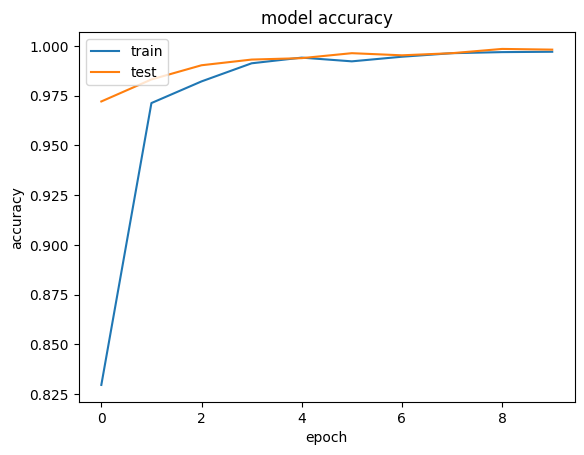

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

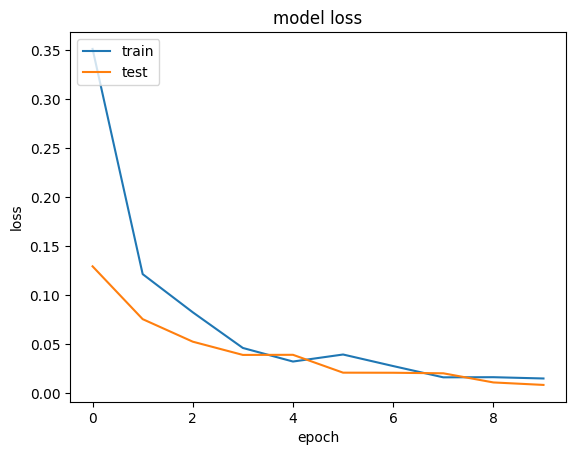

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]
print(predictions[0 : 5])

cluster0 = 0
cluster1 = 0

for i in predictions:
  if i == 0:
    cluster0 += 1
  else:
    cluster1 += 1

print(cluster0)
print(cluster1)

88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step
[0, 1, 0, 1, 1]
1399
1401


In [ ]:
test_sentences = [
    "i wish someone was afraid to lose me i'm always scared of losing people that i love but i doubt anyone would fight to keep me in their life.",
    "i always act like i'm fine and everyone thinks i'm okay, but when the lights are off and i'm all alone. that's when my tears start to fall.",
    "i feel myself changing, i don't even laugh the same anymore, i don't smile the same, or talk the same, i'm just so damn tired of everything.",
    "Everything seems to be exhausting me, no matter how much I sleep or how much coffee I drink or how long I lie down, something inside me seems to have given up. My soul is tired."
]

test_sentences = [clean_text(sentence) for sentence in test_sentences]
test_sentences = np.array(test_sentences)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

predictions = model.predict(test_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[1, 0, 1, 1]


In [ ]:
depressed_tweets_data = pd.read_csv('/datasets/d_tweets.csv')
non_depressed_tweets_data = pd.read_csv('/datasets/non_d_tweets.csv')

depressed_tweets_data.head()
non_depressed_tweets_data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1424756177682927617,1424756177682927617,1.628523e+12,2021-08-09 05:35:18,-1000,NaN,Touch Passes are the new ASMR,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1424741357592084485,1424741357592084485,1.628520e+12,2021-08-09 04:36:24,-1000,NaN,"12 years ago, I called my dad and he gave me s...",en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1424739267553550337,1424739267553550337,1.628519e+12,2021-08-09 04:28:06,-1000,NaN,"There are 6,500 languages yet I choose to only...",en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1424733524234366985,1424733524234366985,1.628518e+12,2021-08-09 04:05:17,-1000,NaN,"Hey everyone, ask for a raise today. I’m tell...",en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1424504791527411712,1424504791527411712,1.628463e+12,2021-08-08 12:56:22,-1000,NaN,I invested in 47 startups in a year. Here's ho...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
d_tweets_text = depressed_tweets_data['tweet']
non_d_tweets_text = non_depressed_tweets_data['tweet']

d_tweets_text = [clean_text(sentence) for sentence in d_tweets_text]
non_d_tweets_text = [clean_text(sentence) for sentence in non_d_tweets_text]

print(d_tweets_text[0:5])
print(non_d_tweets_text[0:5])

['real reason youre sad youre attached people distant youre paying attention people ignore make time people busy youre caring people care le come let people go', 'biggest problem overthinking everything', 'worst sadness sadness youve taught hide', 'make understand make anyone understand happening inside even explain', 'dont think anyone really understands tiring act okay always strong one reality youre close edge']
['touch pass new asmr', 'year ago called dad gave great advice short min story httpstcozjmfezmtk', 'language yet choose speak fact', 'hey everyone ask raise today im telling here happen say yes say accelerate planned timeline say learn stand dont fear awkward convo ask closed mouth dont get fed', 'invested startup year here math shake deployed company k avg check median valuation invested let think loud']


In [ ]:
d_tweets_text = np.array(d_tweets_text)

d_sequences = tokenizer.texts_to_sequences(d_tweets_text)
d_padded = pad_sequences(d_sequences, maxlen=max_length, padding='post', truncating='post')

non_d_tweets_text = np.array(non_d_tweets_text)

non_d_sequences = tokenizer.texts_to_sequences(non_d_tweets_text)
non_d_padded = pad_sequences(non_d_sequences, maxlen=max_length, padding='post', truncating='post')

d_predictions = model.predict(d_padded)
d_predictions = [1 if p > 0.5 else 0 for p in d_predictions]

non_d_predictions = model.predict(non_d_padded)
non_d_predictions = [1 if p > 0.5 else 0 for p in non_d_predictions]


print(d_predictions[0 : 5])
print(non_d_predictions[0 : 5])

110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step
[1, 1, 1, 0, 0]
[0, 0, 0, 0, 0]


In [ ]:
d_cluster0 = 0
d_cluster1 = 0

for i in d_predictions:
  if i == 0:
    d_cluster0 += 1
  else:
    d_cluster1 += 1

print(d_cluster0)
print(d_cluster1)

non_d_cluster0 = 0
non_d_cluster1 = 0

for i in non_d_predictions:
  if i == 0:
    non_d_cluster0 += 1
  else:
    non_d_cluster1 += 1

print(non_d_cluster0)
print(non_d_cluster1)

2141
1355
3965
844


Text(0.5, 1.0, 'Depressed Tweets')

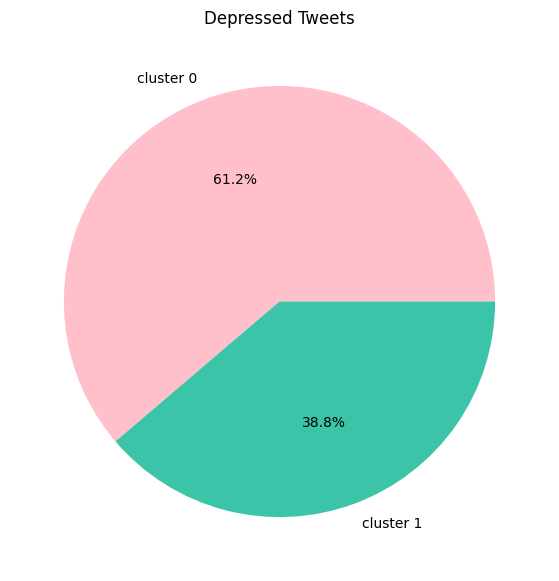

In [ ]:
d_plot_labels = ['cluster 0', 'cluster 1']
d_plot_data = [d_cluster0, d_cluster1]
d_plot_colors = ['pink', '#3bc4a7']

d_fig = plt.figure(figsize=(10, 7))
plt.pie(d_plot_data, labels=d_plot_labels, colors=d_plot_colors, autopct='%1.1f%%')
plt.title("Depressed Tweets")

Text(0.5, 1.0, 'Nondepressed Tweets')

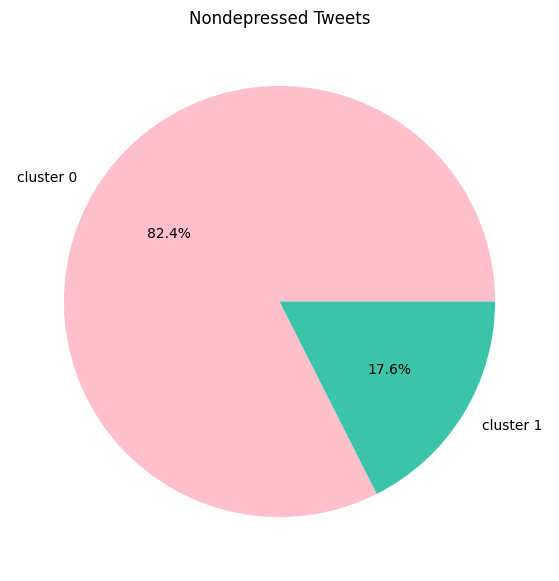

In [ ]:
non_d_plot_labels = ['cluster 0', 'cluster 1']
non_d_plot_data = [non_d_cluster0, non_d_cluster1]
non_d_plot_colors = ['pink', '#3bc4a7']

non_d_fig = plt.figure(figsize=(10, 7))
plt.pie(non_d_plot_data, labels=non_d_plot_labels, colors=non_d_plot_colors, autopct='%1.1f%%')
plt.title("Nondepressed Tweets")

In [ ]:
depressed_tweets_data["prediction"] = d_predictions
non_depressed_tweets_data["prediction"] = non_d_predictions

In [ ]:
depressed_users = depressed_tweets_data["username"].unique()
print(depressed_users)

non_depressed_users = non_depressed_tweets_data["username"].unique()
print(non_depressed_users)

['depressingmsgs' 'Depressed1278' 'suicidalconcept' 'Depressed2102'
 'sosadtoday' 'Abby_0921']
['ShaanVP' 'baemax' 'simonsinek' 'qtcinderella' 'IyanlaVanzant'
 'ConanOBrien']


In [ ]:
d_user_1 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
d_user_2 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
d_user_3 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
d_user_4 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
d_user_5 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
d_user_6 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])

non_d_user_1 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
non_d_user_2 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
non_d_user_3 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
non_d_user_4 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
non_d_user_5 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])
non_d_user_6 = pd.DataFrame(columns = ['user', 'tweet', 'prediction'])


for row in depressed_tweets_data.iterrows():
  if row[1]["username"] == depressed_users[0]:
    d_user_1 = pd.concat([d_user_1, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == depressed_users[1]:
    d_user_2 = pd.concat([d_user_2, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == depressed_users[2]:
    d_user_3 = pd.concat([d_user_3, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == depressed_users[3]:
    d_user_4 = pd.concat([d_user_4, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == depressed_users[4]:
    d_user_5 = pd.concat([d_user_5, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == depressed_users[5]:
    d_user_6 = pd.concat([d_user_6, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)

for row in non_depressed_tweets_data.iterrows():
  if row[1]["username"] == non_depressed_users[0]:
    non_d_user_1 = pd.concat([non_d_user_1, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == non_depressed_users[1]:
    non_d_user_2 = pd.concat([non_d_user_2, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == non_depressed_users[2]:
    non_d_user_3 = pd.concat([non_d_user_3, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == non_depressed_users[3]:
    non_d_user_4 = pd.concat([non_d_user_4, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == non_depressed_users[4]:
    non_d_user_5 = pd.concat([non_d_user_5, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)
  if row[1]["username"] == non_depressed_users[5]:
    non_d_user_6 = pd.concat([non_d_user_6, pd.DataFrame([{"user":row[1]["username"], "tweet":row[1]["tweet"], "prediction":row[1]["prediction"]}])], ignore_index=True)


In [ ]:
d_user_1_cluster_0 = len(d_user_1[d_user_1['prediction'] == 0])
d_user_1_cluster_1 = len(d_user_1[d_user_1['prediction'] == 1])

d_user_2_cluster_0 = len(d_user_2[d_user_2['prediction'] == 0])
d_user_2_cluster_1 = len(d_user_2[d_user_2['prediction'] == 1])

d_user_3_cluster_0 = len(d_user_3[d_user_3['prediction'] == 0])
d_user_3_cluster_1 = len(d_user_3[d_user_3['prediction'] == 1])

d_user_4_cluster_0 = len(d_user_4[d_user_4['prediction'] == 0])
d_user_4_cluster_1 = len(d_user_4[d_user_4['prediction'] == 1])

d_user_5_cluster_0 = len(d_user_5[d_user_5['prediction'] == 0])
d_user_5_cluster_1 = len(d_user_5[d_user_5['prediction'] == 1])

d_user_6_cluster_0 = len(d_user_6[d_user_6['prediction'] == 0])
d_user_6_cluster_1 = len(d_user_6[d_user_6['prediction'] == 1])

non_d_user_1_cluster_0 = len(non_d_user_1[non_d_user_1['prediction'] == 0])
non_d_user_1_cluster_1 = len(non_d_user_1[non_d_user_1['prediction'] == 1])

non_d_user_2_cluster_0 = len(non_d_user_2[non_d_user_2['prediction'] == 0])
non_d_user_2_cluster_1 = len(non_d_user_2[non_d_user_2['prediction'] == 1])

non_d_user_3_cluster_0 = len(non_d_user_3[non_d_user_3['prediction'] == 0])
non_d_user_3_cluster_1 = len(non_d_user_3[non_d_user_3['prediction'] == 1])

non_d_user_4_cluster_0 = len(non_d_user_4[non_d_user_4['prediction'] == 0])
non_d_user_4_cluster_1 = len(non_d_user_4[non_d_user_4['prediction'] == 1])

non_d_user_5_cluster_0 = len(non_d_user_5[non_d_user_5['prediction'] == 0])
non_d_user_5_cluster_1 = len(non_d_user_5[non_d_user_5['prediction'] == 1])

non_d_user_6_cluster_0 = len(non_d_user_6[non_d_user_6['prediction'] == 0])
non_d_user_6_cluster_1 = len(non_d_user_6[non_d_user_6['prediction'] == 1])

Text(0.5, 1.0, 'Depressed User 1 Tweets')

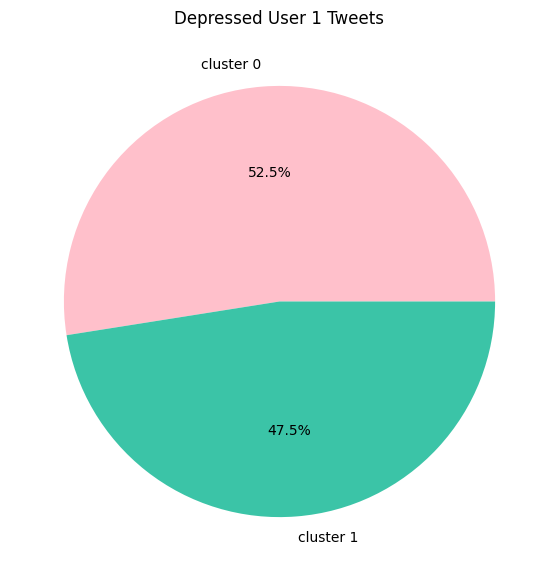

In [ ]:
d_1_plot_labels = ['cluster 0', 'cluster 1']
d_1_plot_data = [d_user_1_cluster_0, d_user_1_cluster_1]
d_1_plot_colors = ['pink', '#3bc4a7']

d_1_fig = plt.figure(figsize=(10, 7))
plt.pie(d_1_plot_data, labels=d_1_plot_labels, colors=d_1_plot_colors, autopct='%1.1f%%')
plt.title("Depressed User 1 Tweets")

Text(0.5, 1.0, 'Depressed User 2 Tweets')

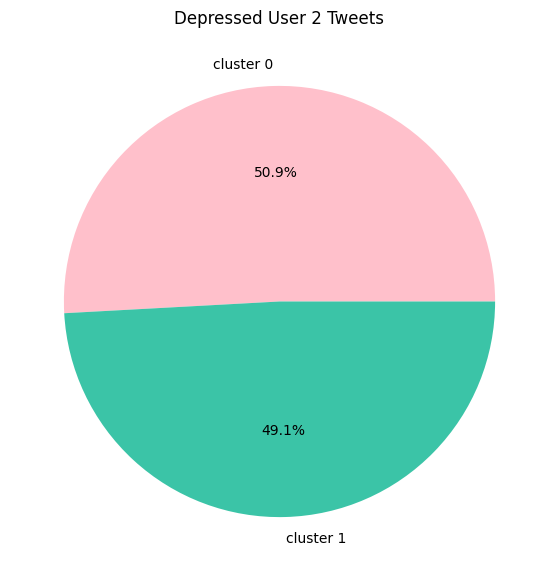

In [ ]:
d_2_plot_labels = ['cluster 0', 'cluster 1']
d_2_plot_data = [d_user_2_cluster_0, d_user_2_cluster_1]
d_2_plot_colors = ['pink', '#3bc4a7']

d_2_fig = plt.figure(figsize=(10, 7))
plt.pie(d_2_plot_data, labels=d_2_plot_labels, colors=d_2_plot_colors, autopct='%1.1f%%')
plt.title("Depressed User 2 Tweets")

Text(0.5, 1.0, 'Depressed User 3 Tweets')

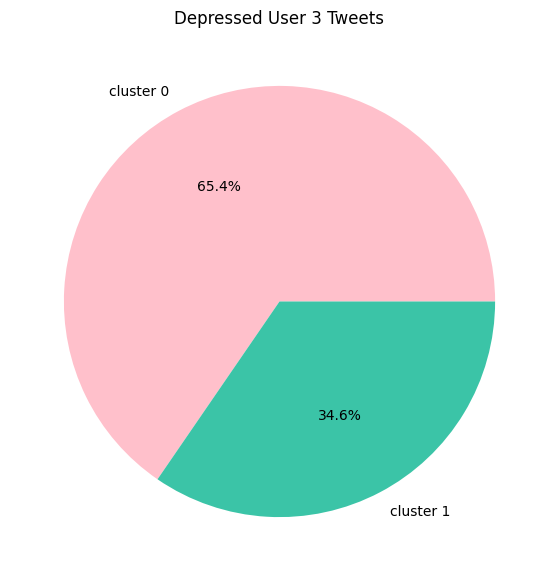

In [ ]:
d_3_plot_labels = ['cluster 0', 'cluster 1']
d_3_plot_data = [d_user_3_cluster_0, d_user_3_cluster_1]
d_3_plot_colors = ['pink', '#3bc4a7']

d_3_fig = plt.figure(figsize=(10, 7))
plt.pie(d_3_plot_data, labels=d_3_plot_labels, colors=d_3_plot_colors, autopct='%1.1f%%')
plt.title("Depressed User 3 Tweets")

Text(0.5, 1.0, 'Depressed User 4 Tweets')

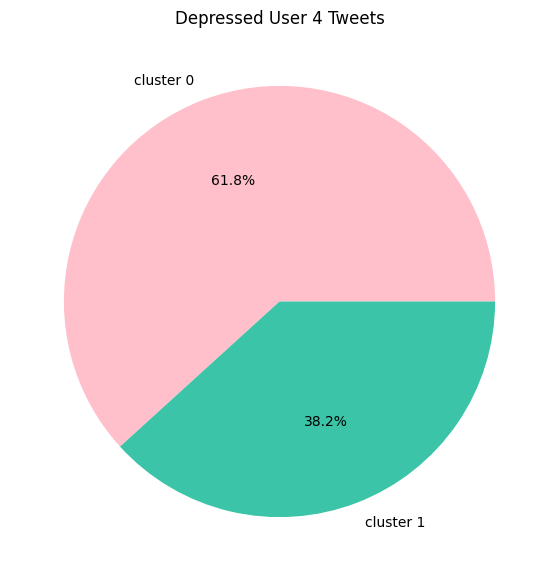

In [ ]:
d_4_plot_labels = ['cluster 0', 'cluster 1']
d_4_plot_data = [d_user_4_cluster_0, d_user_4_cluster_1]
d_4_plot_colors = ['pink', '#3bc4a7']

d_4_fig = plt.figure(figsize=(10, 7))
plt.pie(d_4_plot_data, labels=d_4_plot_labels, colors=d_4_plot_colors, autopct='%1.1f%%')
plt.title("Depressed User 4 Tweets")

Text(0.5, 1.0, 'Depressed User 5 Tweets')

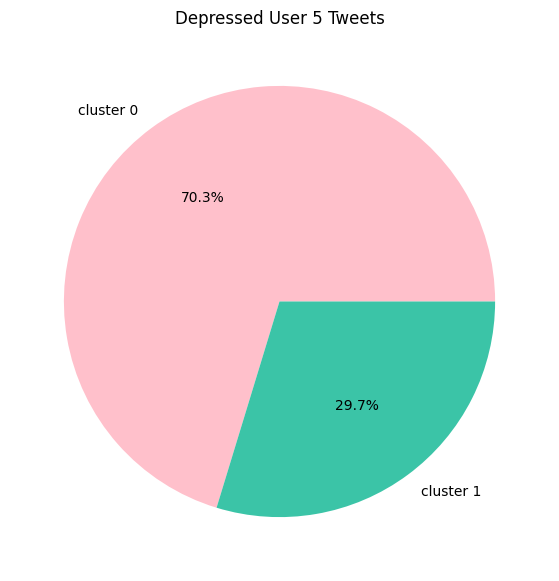

In [ ]:
d_5_plot_labels = ['cluster 0', 'cluster 1']
d_5_plot_data = [d_user_5_cluster_0, d_user_5_cluster_1]
d_5_plot_colors = ['pink', '#3bc4a7']

d_5_fig = plt.figure(figsize=(10, 7))
plt.pie(d_5_plot_data, labels=d_5_plot_labels, colors=d_5_plot_colors, autopct='%1.1f%%')
plt.title("Depressed User 5 Tweets")

Text(0.5, 1.0, 'Depressed User 6 Tweets')

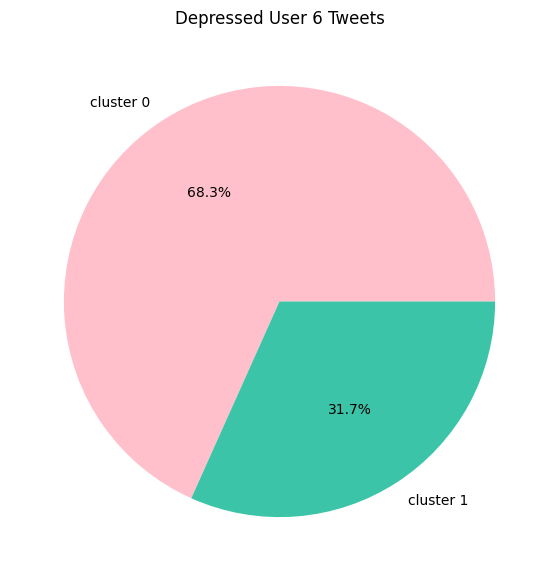

In [ ]:
d_6_plot_labels = ['cluster 0', 'cluster 1']
d_6_plot_data = [d_user_6_cluster_0, d_user_6_cluster_1]
d_6_plot_colors = ['pink', '#3bc4a7']

d_6_fig = plt.figure(figsize=(10, 7))
plt.pie(d_6_plot_data, labels=d_6_plot_labels, colors=d_6_plot_colors, autopct='%1.1f%%')
plt.title("Depressed User 6 Tweets")

Text(0.5, 1.0, 'Nondepressed User 1 Tweets')

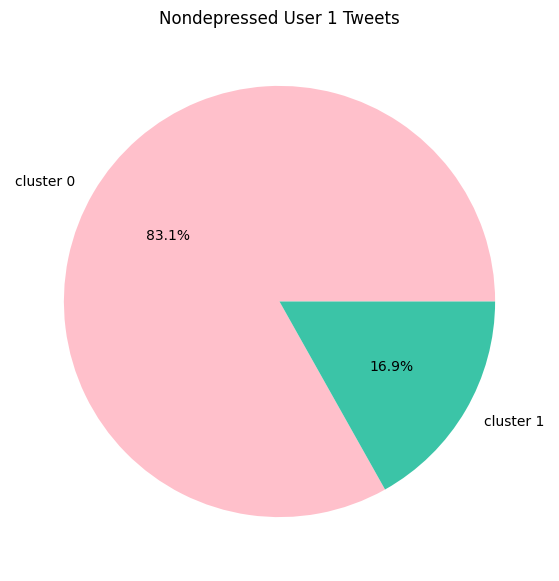

In [ ]:
non_d_1_plot_labels = ['cluster 0', 'cluster 1']
non_d_1_plot_data = [non_d_user_1_cluster_0, non_d_user_1_cluster_1]
non_d_1_plot_colors = ['pink', '#3bc4a7']

non_d_1_fig = plt.figure(figsize=(10, 7))
plt.pie(non_d_1_plot_data, labels=non_d_1_plot_labels, colors=non_d_1_plot_colors, autopct='%1.1f%%')
plt.title("Nondepressed User 1 Tweets")

Text(0.5, 1.0, 'Nondepressed User 2 Tweets')

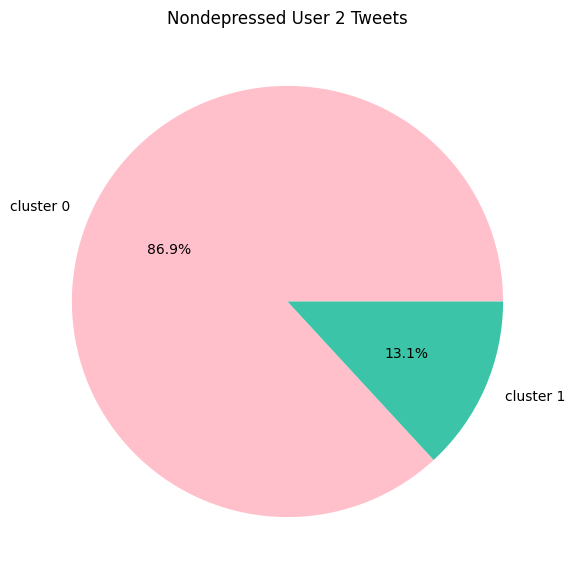

In [ ]:
non_d_2_plot_labels = ['cluster 0', 'cluster 1']
non_d_2_plot_data = [non_d_user_2_cluster_0, non_d_user_2_cluster_1]
non_d_2_plot_colors = ['pink', '#3bc4a7']

non_d_2_fig = plt.figure(figsize=(10, 7))
plt.pie(non_d_2_plot_data, labels=non_d_2_plot_labels, colors=non_d_2_plot_colors, autopct='%1.1f%%')
plt.title("Nondepressed User 2 Tweets")

Text(0.5, 1.0, 'Nondepressed User 3 Tweets')

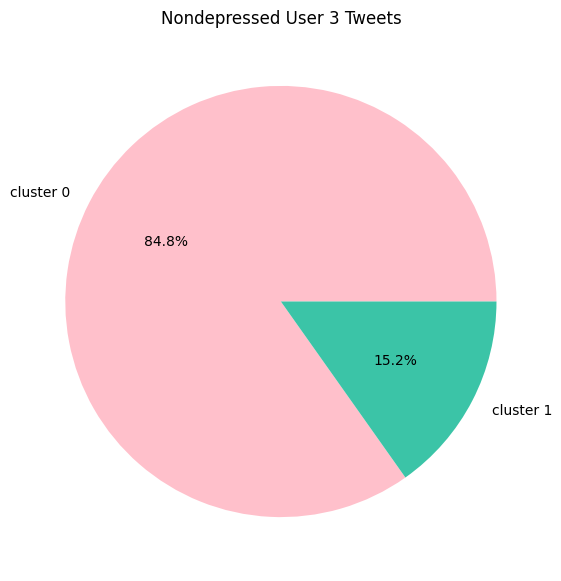

In [ ]:
non_d_3_plot_labels = ['cluster 0', 'cluster 1']
non_d_3_plot_data = [non_d_user_3_cluster_0, non_d_user_3_cluster_1]
non_d_3_plot_colors = ['pink', '#3bc4a7']

non_d_3_fig = plt.figure(figsize=(10, 7))
plt.pie(non_d_3_plot_data, labels=non_d_3_plot_labels, colors=non_d_3_plot_colors, autopct='%1.1f%%')
plt.title("Nondepressed User 3 Tweets")

Text(0.5, 1.0, 'Nondepressed User 4 Tweets')

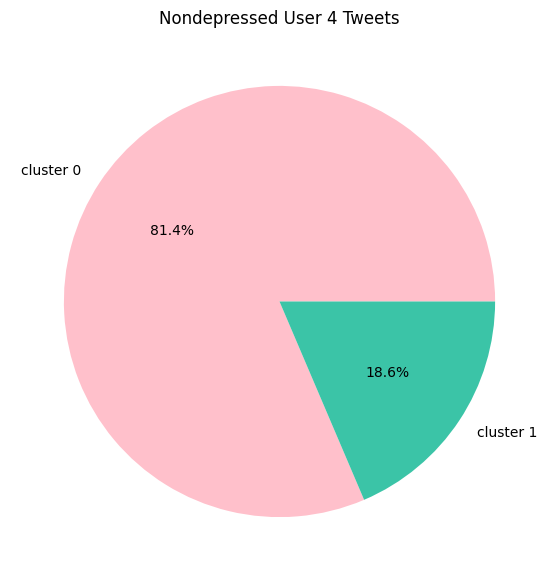

In [ ]:
non_d_4_plot_labels = ['cluster 0', 'cluster 1']
non_d_4_plot_data = [non_d_user_4_cluster_0, non_d_user_4_cluster_1]
non_d_4_plot_colors = ['pink', '#3bc4a7']

non_d_4_fig = plt.figure(figsize=(10, 7))
plt.pie(non_d_4_plot_data, labels=non_d_4_plot_labels, colors=non_d_4_plot_colors, autopct='%1.1f%%')
plt.title("Nondepressed User 4 Tweets")

Text(0.5, 1.0, 'Nondepressed User 5 Tweets')

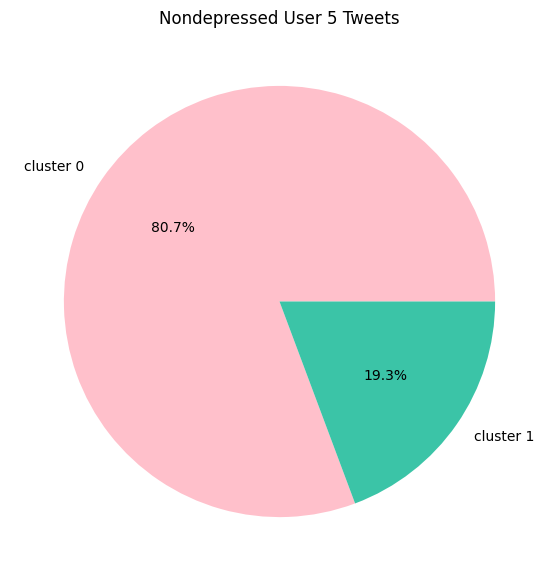

In [ ]:
non_d_5_plot_labels = ['cluster 0', 'cluster 1']
non_d_5_plot_data = [non_d_user_5_cluster_0, non_d_user_5_cluster_1]
non_d_5_plot_colors = ['pink', '#3bc4a7']

non_d_5_fig = plt.figure(figsize=(10, 7))
plt.pie(non_d_5_plot_data, labels=non_d_5_plot_labels, colors=non_d_5_plot_colors, autopct='%1.1f%%')
plt.title("Nondepressed User 5 Tweets")

Text(0.5, 1.0, 'Nondepressed User 6 Tweets')

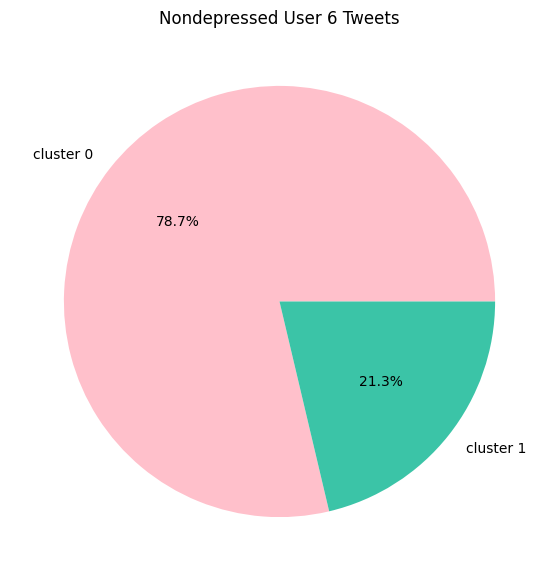

In [ ]:
non_d_6_plot_labels = ['cluster 0', 'cluster 1']
non_d_6_plot_data = [non_d_user_6_cluster_0, non_d_user_6_cluster_1]
non_d_6_plot_colors = ['pink', '#3bc4a7']

non_d_6_fig = plt.figure(figsize=(10, 7))
plt.pie(non_d_6_plot_data, labels=non_d_6_plot_labels, colors=non_d_6_plot_colors, autopct='%1.1f%%')
plt.title("Nondepressed User 6 Tweets")